# STAROSTNE SKUPINE ZA DRŽAVE SVETA

Delo na data setu POPULATION_BY_AGE_BOTH_SEXES.   


## Priprava podatkov

In [1]:
import pandas as pandas
#import geoplot
#import geopandas
import math
import matplotlib.pyplot as plt
import numpy as np 
#import plotly.graph_objs as go
#from IPython.display import HTML
#from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
"""warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')"""
%matplotlib inline

rows_to_skip = [i for i in range(0, 16)]  
rows_to_skip.extend([i for i in range(17, 272)])   # odstranjevanje vrstic ki bi delale probleme
rows_to_skip.extend([i for i in range(362, 377)])
names  =["Region-Country", "Date", "0-4", "5-9",  "10-14", "15-19", "20-24", "25-29", 
         "30-34", "35-39", "40-44", "45-49", "50-54", "55-59",  "60-64", "65-69", "70-74", "75-79",
         "80-84", "85-89", "90-94", "95-99", "100+"]

main_set = pandas.read_excel('../podatki/POPULATION_BY_AGE_BOTH_SEXES.xlsx', 
                             usecols=(2, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28),
                                skiprows=rows_to_skip,
                                names=names)
main_set["population_sum"] = np.NaN
main_set["avg_age"] = np.NaN

for index, row in main_set.iterrows():
    temp_sum = 0
    for num_range, num in row[2:-2].iteritems():
        temp_sum += num

    main_set.loc[index,"population_sum"] = float(temp_sum)

    pop_age = 0        # mogoče zamenji z mediano 
    age_range = 2
    for num_range, num in row[2:-2].iteritems():
        pop_age += (num / temp_sum) * age_range
        age_range += 5
    main_set.loc[index,"avg_age"] = float(pop_age)

In [2]:
#main_set

Pripravil sem si podatke tako, da sem odstranil vrstice in stolpce katerih nisem potreboval ter nastavil header.

Funkcija za dobit skupno populacijo države za dano leto :

In [3]:
def drawBarChart(year_and_pop_ar, country):
    fig=plt.figure(figsize=(10, 8), dpi= 100, facecolor='w')
    plt.bar([i[0] for i in year_and_pop_ar], [i[1] for i in year_and_pop_ar], 
            color='royalblue', alpha=0.7, width=3)
    #plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.xlabel('Years')
    plt.ylabel('Number in thousands')
    plt.title(country + ' population growth graph')
    plt.show()
    
def drawScatter(year_and_pop_ar, country):
    fig=plt.figure(figsize=(10, 8), dpi= 100, facecolor='w')
    date_arr  = [i[0] for i in year_and_pop_ar]
    pop_arr = [i[1] for i in year_and_pop_ar]
    max_pop = max(pop_arr)
    step = int(math.ceil(max_pop / 1000.0)) * 1000 / 10

    plt.plot(date_arr, pop_arr)
    plt.scatter(date_arr, pop_arr, color=(0.1, 0.9, 1, 0.90))
    plt.yticks(np.arange(0,  max_pop + step*2, step))
    plt.xlabel('Years')
    plt.ylabel('Number in thousands')
    plt.title(country + ' population growth graph')
    plt.show()
    
def getSumPopulationArray(country):
    year_pop_array = []
    
    for date in range(1960, 2021, 5):
        pop = float(main_set[(main_set['Region-Country'] == country) & (main_set["Date"] == date)]["population_sum"].values)
        year_pop_array.append((date, pop))
    return year_pop_array 

Tukaj lahko vidimo rast populacije za dano državo skozi leta.

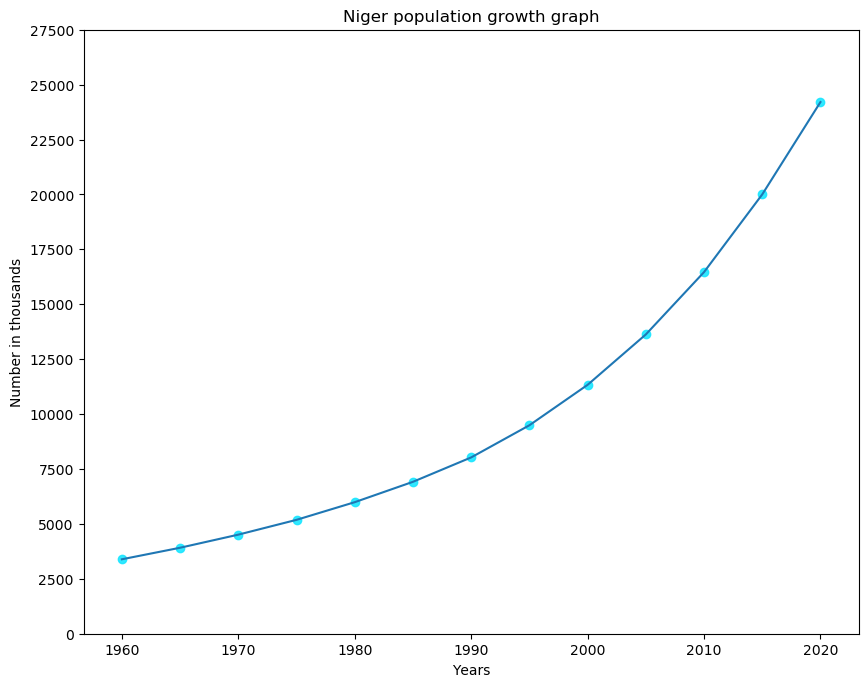

In [24]:
country = "Niger"
country_pop = getSumPopulationArray(country)
drawScatter(country_pop, country)

Grafi starostne razporeditve dane države v enem letu.

In [25]:
def getAgeDistribution(country, date):
        distribution_array = []
        country_pop = main_set[(main_set['Region-Country'] == country) & (main_set["Date"] == date)]
        temp_sum = country_pop.iloc[:, 2:-2]
        
        for age, value in temp_sum.iteritems():
            distribution_array.append((age, value.iloc[0]))
        
        return distribution_array

def drawBarChartDistribution(year_and_pop_ar, country):
    fig=plt.figure(figsize=(10, 8), dpi= 100, facecolor='w')
    plt.barh([i[0] for i in year_and_pop_ar], [i[1] for i in year_and_pop_ar], 
            color='royalblue', alpha=0.7)
    #plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.xlabel('Number in thousands')
    plt.ylabel('Years')
    plt.title(country + ' population age distribution')
    plt.savefig('Japan.png')
    plt.show()
    

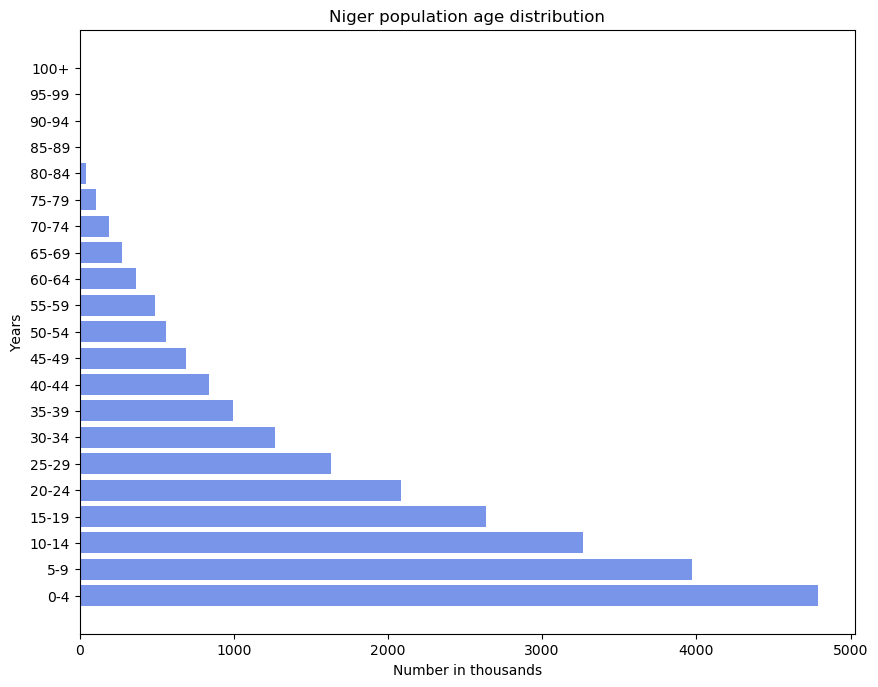

In [26]:
work = getAgeDistribution(country, 2020)
drawBarChartDistribution(work, country)


Omogočen izpis držav z največjo in najmanjšo povprečno starostjo. Kmalu bo vključena tudi mediana.

In [7]:
only_2020_data = main_set.copy()

In [16]:
for index, row in only_2020_data.iterrows():
    if row[1] != 2020:
        only_2020_data = only_2020_data.drop(index)
 
only_2020_data = only_2020_data.sort_values(by=["avg_age"])
only_2020_data.nlargest(20, "avg_age")

,Region-Country,Date,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+,population_sum,avg_age
1709,Japan,2020,4778.481,5401.488,5564.526,5702.645,5996.877,6150.448,6789.745,7665.671,...,8379.113,9127.318,7058.057,5339.049,3630.344,1785.823,517.525,78.636,126476.458,46.952638
3284,Italy,2020,2324.694,2670.301,2857.357,2876.091,2942.506,3160.930,3365.512,3632.922,...,3531.295,3391.798,2637.110,2302.393,1397.261,639.739,172.639,16.517,60461.828,45.305040
3344,Portugal,2020,400.652,440.424,489.999,525.167,539.834,533.864,560.997,654.312,...,621.305,566.943,451.371,352.212,224.130,84.924,19.175,1.961,10196.707,44.645591
3269,Greece,2020,409.459,471.668,542.237,526.618,529.416,527.800,597.812,738.703,...,580.634,549.464,406.619,394.392,260.756,104.969,23.197,2.681,10423.056,44.401792
3464,Germany,2020,4058.679,3822.225,3811.645,4118.971,4553.436,4823.925,5441.865,5430.155,...,4823.439,3833.823,3637.591,3259.094,1635.049,758.147,204.159,19.295,83783.945,44.028523
3209,Southern Europe,2020,6305.534,7084.710,7713.512,7521.029,7778.283,8167.915,8838.587,9998.977,...,8698.351,7869.520,6085.987,4936.143,3213.505,1394.785,341.276,35.143,152215.243,44.009181
3389,Spain,2020,1990.096,2244.391,2497.954,2238.123,2255.909,2361.690,2618.972,3283.021,...,2401.343,2204.150,1811.156,1288.336,1039.117,471.255,112.050,13.083,46754.783,43.543439
2129,Martinique,2020,18.353,17.600,22.799,24.323,24.395,16.977,16.928,17.174,...,24.156,19.568,14.104,11.245,7.638,3.361,1.116,0.235,375.265,43.505110
1649,"China, Hong Kong SAR",2020,362.563,301.632,285.856,266.803,374.346,493.283,536.342,585.823,...,459.791,344.127,180.957,177.823,119.620,59.859,18.476,3.561,7496.988,43.501992
2894,Bulgaria,2020,312.730,336.652,370.613,315.268,299.467,390.450,480.839,476.752,...,455.294,424.600,285.768,191.839,101.275,28.222,4.510,0.179,6948.445,43.361899


## Map of the world

You can choose a country by clicking on it.

In [9]:
"""world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)
geoplot.polyplot(world, figsize=(8, 4))"""
def plotmap(df, plot_series, color_title, scl, title):
    data = dict(type = 'choropleth')

    layout = dict(title=title,
                geo=dict(showframe=False, projection={'type':'equirectangular'}))

    fig = go.Figure(data = [data], layout = layout)
    iplot(fig)
